In [8]:
import numpy as np
pi=np.pi

import matplotlib.pyplot as plt

In [9]:
from src import phasr as phr
from src.phasr.utility.math import derivative as deriv
from src.phasr.utility.math import radial_laplace as lap

In [10]:
# Al27
J_Al27=5/2
Z_Al27=13
A_Al27=27
# L=0
Cs_Mpl_Al27=np.array([27, -11.3343, 0.837814])
Cs_Mmi_Al27=np.array([2*13-27, 0.666696, -0.0858552])
Cs_Phipl_Al27=np.array([-4.98975 , 0.997985])
Cs_Phimi_Al27=np.array([0.303398 , -0.0606814])
# L=2
Cs_Mpl2_Al27=np.array([0, 0.992794, -0.201169])
Cs_Mmi2_Al27=np.array([0, 0.36474, -0.0201471])
Cs_Phipl2_Al27=np.array([-0.0278931, -0.223404])
Cs_Phimi2_Al27=np.array([0.655348, -0.0947049])
# L=4
Cs_Mpl4_Al27=np.array([0, 0, -0.0827811])
Cs_Mmi4_Al27=np.array([0, 0, -0.156105])
Cs_Phipl4_Al27=np.array([0, -0.200917])
Cs_Phimi4_Al27=np.array([0, -0.24046])
#
# Al27 Delta (soon)
norm = 2*np.sqrt(4*pi/(2*J_Al27+1))
# L=1
Cs_Delta_p1_Al27=norm*np.array([0, 0, 0]) # tmp for testing
Cs_Delta_n1_Al27=norm*np.array([0, 0, 0]) # tmp for testing
Cs_Sigmap_p1_Al27=norm*np.array([0.217688, -0.199127, 0.0274599])
Cs_Sigmap_n1_Al27=norm*np.array([0.0255784, -0.00985665, -0.00150251])
Cs_Sigmapp_p1_Al27=norm*np.array([0.153928, -0.0262479, 0.00103769])
Cs_Sigmapp_n1_Al27=norm*np.array([0.0180868, -0.022234, 0.00278141])
# L=3
Cs_Delta_p3_Al27=norm*np.array([0, 0, 0]) # tmp for testing
Cs_Delta_n3_Al27=norm*np.array([0, 0, 0]) # tmp for testing
Cs_Sigmap_p3_Al27=norm*np.array([0, -0.0543796, 0.00651646])
Cs_Sigmap_n3_Al27=norm*np.array([0, 0.000280434, -0.000488419])
Cs_Sigmapp_p3_Al27=norm*np.array([0, -0.0470943, -0.00206298])
Cs_Sigmapp_n3_Al27=norm*np.array([0, 0.000242867, 0.000103865])
# L=5
Cs_Delta_p5_Al27=norm*np.array([0, 0, 0]) # tmp for testing
Cs_Delta_n5_Al27=norm*np.array([0, 0, 0]) # tmp for testing
Cs_Sigmap_p5_Al27=norm*np.array([0, 0, 0.0277341])
Cs_Sigmap_n5_Al27=norm*np.array([0, 0, 0.000128524])
Cs_Sigmapp_p5_Al27=norm*np.array([0, 0, 0.0253177])
Cs_Sigmapp_n5_Al27=norm*np.array([0, 0, 0.000117327])
#

In [11]:
nuc_test = phr.nucleus('test_Al27',Z=13,A=27,Ci_dict={'M00':Cs_Mpl_Al27,'M01':Cs_Mmi_Al27,'Phipp00':Cs_Phipl_Al27,'Phipp01':Cs_Phimi_Al27,'M20':Cs_Mpl2_Al27,'M21':Cs_Mmi2_Al27,'Phipp20':Cs_Phipl2_Al27,'Phipp21':Cs_Phimi2_Al27,'Sigmap1p':Cs_Sigmap_p1_Al27,'Sigmap1n':Cs_Sigmap_n1_Al27})

In [12]:
nuc_test.__dict__

{'nucleus_type': 'oszillator-basis',
 'name': 'test_Al27',
 'Z': 13,
 'A': 27,
 'm': 25133.143901270712,
 'abundance': 1.0,
 'spin': 2.5,
 'parity': 1,
 'Qw': -12.9244,
 'multipoles': ['M00',
  'M01',
  'M0n',
  'M0p',
  'M20',
  'M21',
  'M2n',
  'M2p',
  'Phipp00',
  'Phipp01',
  'Phipp0n',
  'Phipp0p',
  'Phipp20',
  'Phipp21',
  'Phipp2n',
  'Phipp2p',
  'Sigmap10',
  'Sigmap11',
  'Sigmap1n',
  'Sigmap1p'],
 'Ci_M00': array([ 27.      , -11.3343  ,   0.837814]),
 'Ci_M01': array([-1.       ,  0.666696 , -0.0858552]),
 'Ci_Phipp00': array([-4.98975 ,  0.997985]),
 'Ci_Phipp01': array([ 0.303398 , -0.0606814]),
 'Ci_M20': array([ 0.      ,  0.992794, -0.201169]),
 'Ci_M21': array([ 0.       ,  0.36474  , -0.0201471]),
 'Ci_Phipp20': array([-0.0278931, -0.223404 ]),
 'Ci_Phipp21': array([ 0.655348 , -0.0947049]),
 'Ci_Sigmap1p': array([ 0.63007724, -0.57635419,  0.07948007]),
 'Ci_Sigmap1n': array([ 0.07403425, -0.02852914, -0.00434887]),
 'Ci_M0p': array([13.       , -5.333802 ,  0.

In [34]:
rrange=[0.1,9.87,0.0001]
'_r='+str(rrange[0])+'-'+str(rrange[1])+'-'+str(rrange[2])

'_r=0.1-9.87-0.0001'

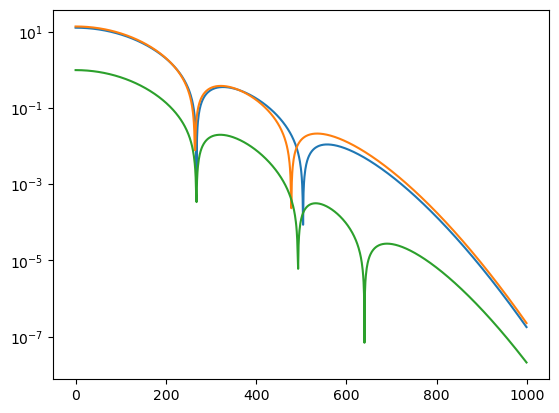

In [21]:
q=np.arange(0,1000,1.)
plt.plot(q,np.abs(nuc_test.FM0p(q)))
plt.plot(q,np.abs(nuc_test.FM0n(q)))
plt.plot(q,np.abs(nuc_test.form_factor(q)))
plt.yscale('log')

In [22]:
nuc_test.charge_density(5)

0.0026424601045817336

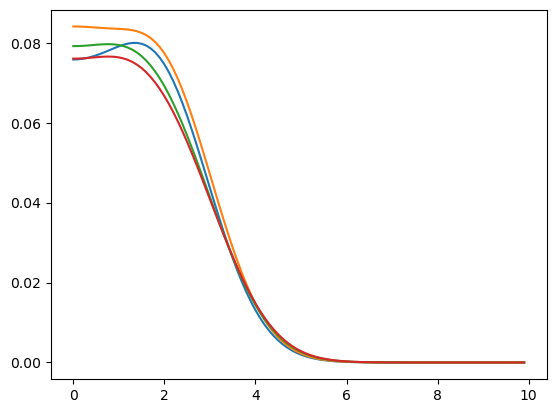

In [23]:
r=np.arange(0,10,0.1)
plt.plot(r,nuc_test.proton_density(r))
plt.plot(r,nuc_test.neutron_density(r))
plt.plot(r,nuc_test.charge_density(r))
plt.plot(r,-nuc_test.weak_density(r))

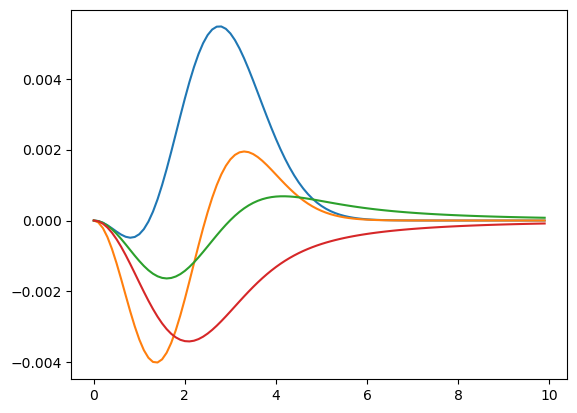

In [24]:
r=np.arange(0,10,0.1)
plt.plot(r,nuc_test.rhoM2p(r))
plt.plot(r,nuc_test.rhoM2n(r))
plt.plot(r,nuc_test.rhoPhipp2p(r))
plt.plot(r,nuc_test.rhoPhipp2n(r))

(0.0, 0.025)

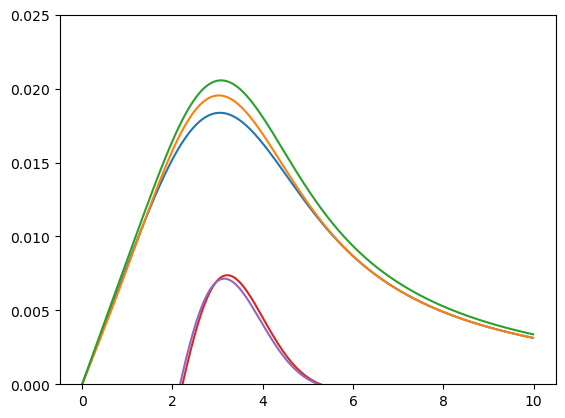

In [25]:
r=np.arange(0,10,1e-2)
plt.plot(r,nuc_test.electric_field(r))
plt.plot(r,nuc_test.ElM0p(r))
plt.plot(r,nuc_test.ElM0n(r))
plt.plot(r,-lap(nuc_test.ElM0n)(r))
plt.plot(r,-lap(nuc_test.ElM0p)(r))
plt.ylim(0,0.025)

(-0.025, 0.025)

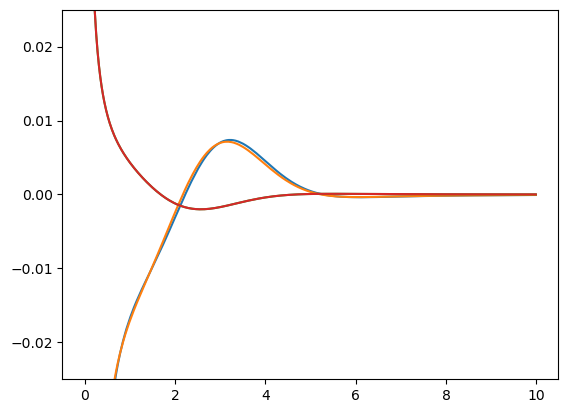

In [26]:
r=np.arange(0,10,1e-2)
plt.plot(r,-lap(nuc_test.ElM0n)(r))
plt.plot(r,-lap(nuc_test.ElM0p)(r))
plt.plot(r,-lap(nuc_test.ElPhipp0p)(r))
plt.plot(r,-lap(nuc_test.ElPhipp0p)(r))
plt.ylim(-0.025,0.025)

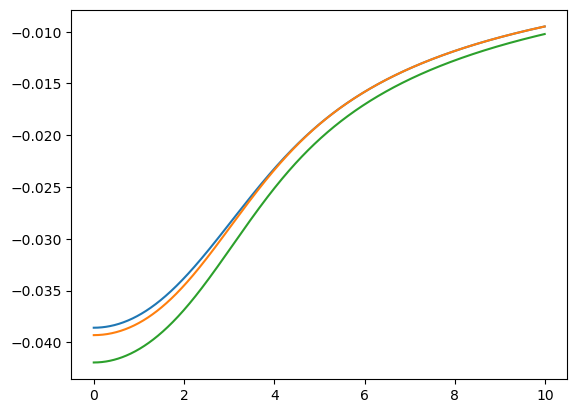

In [27]:
r=np.arange(0,10,1e-2)
plt.plot(r,nuc_test.electric_potential(r))
plt.plot(r,nuc_test.VM0p(r))
plt.plot(r,nuc_test.VM0n(r))
#plt.ylim(0,0.025)

In [45]:
from mpmath import polylog, lerchphi

In [44]:
polylog(3,-1)

mpf('1.2020569031595942')

In [46]:
lerchphi(3,2,1+1j*4)

mpc(real='0.02783726382535737', imag='-0.0052033579776378019')